In this notebook, we calculate daily sentiment indices using both LM sentiment and extended sentiment. Additionally, we generate daily sentiment indices using extended sentiment, but exclusively from articles that mention either the index firms or their competitors.

To develop a function that calculates sentiment for each individual article (`tone_with_negation`), we referenced the article by Kai Chen, available at [Kai Chen's Blog](http://18.223.234.161/?p=399).

In [1]:
import os
import pandas as pd

path_to_file = os.getcwd()
data = pd.read_csv(path_to_file + '\\data_comp.csv', encoding = 'utf-8-sig', sep=';')
data.head()

,titles,dates_day,year,month,day,texts,competitors,indexfirms
0,Chilean salmon prices see a lift in week 1.,2016-01-13,2016,1,13,Chilean salmon prices see a lift in week 1. Pr...,0,0
1,Nasdaq salmon price index up 48% over past thr...,2016-01-13,2016,1,13,Nasdaq salmon price index up 48% over past thr...,0,0
2,Great time to be in the seafood industry.,2016-01-18,2016,1,18,Great time to be in the seafood industry. Nati...,0,0
3,Fresh = healthy.,2016-01-18,2016,1,18,Fresh = healthy. Fresh translates to healthy i...,0,0
4,Shrimp to get social media revamp.,2016-01-18,2016,1,18,Shrimp to get social media revamp. The NFI Shr...,0,0


## Daily sentiment index using LM dictionary (all articles)

In [2]:
import tone_with_negation

import multiprocessing as mp
from datetime import datetime
from itertools import repeat
import itertools

# Set the number of cores to use
NUM_CORE = mp.cpu_count()-4

inputs = zip(data['texts'], itertools.repeat(0))

startTime = datetime.now()

if __name__ == "__main__":
    pool = mp.Pool(NUM_CORE)
    sentiment_LM = pool.starmap(tone_with_negation.tone_with_negation, inputs)
    pool.close()
    pool.join()

print(datetime.now()-startTime)

data['sentiment_LM'] = sentiment_LM

0:01:03.268287


In [3]:
# Convert a string in the format year-month-day to datetime using pandas.
data['dates_day'] = pd.to_datetime(data['dates_day'])

# Use the column dates_day as an index. 
data.set_index(['dates_day'], inplace=True)

# Save an average daily sentiment as 'sentiment_LM_index_daily'.
sentiment_LM_index_daily = data[['sentiment_LM']].groupby('dates_day').mean()

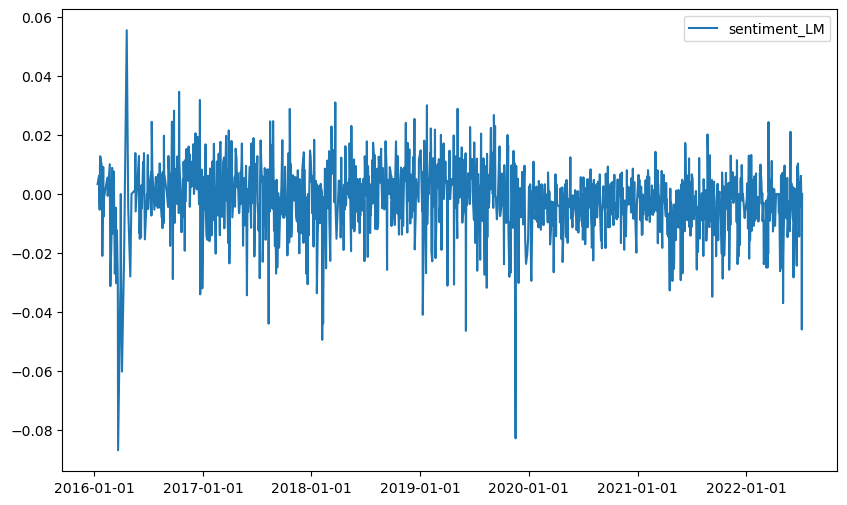

In [4]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Generate an instance of figure.Figure and axes.Axes. Specify the size.
fig, ax = plt.subplots(figsize=(10, 6))
# Now that we have an Axes instance, we can plot on top of it: ax.plot(x,y).
ax.plot(sentiment_LM_index_daily.index, sentiment_LM_index_daily[['sentiment_LM']])
# ax.xaxis lets you perform actions on the x axis.
# Set the formatter of the labels using matplotlib.dates.DateFormatter.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
# Add a legend.
ax.legend(['sentiment_LM'])

In [5]:
# Change the format of the index using pandas.DatetimeIndex.strftime
sentiment_LM_index_daily.index = sentiment_LM_index_daily.index.strftime('%Y-%m-%d')
sentiment_LM_index_daily.head()

,sentiment_LM
dates_day,
2016-01-13,0.003378
2016-01-18,0.006187
2016-01-19,-0.002157
2016-01-20,-0.005331
2016-01-21,0.009215


In [6]:
# Save the index to Excel file.
sentiment_LM_index_daily.to_excel('sentiment_daily_LM.xlsx')

## Daily sentiment index using extended dictionary (all articles)

In [7]:
inputs = zip(data['texts'], itertools.repeat(2))

startTime = datetime.now()

if __name__ == "__main__":
    pool = mp.Pool(NUM_CORE)
    sentiment_extend = pool.starmap(tone_with_negation.tone_with_negation, inputs)
    pool.close()
    pool.join()

print(datetime.now()-startTime)

data['sentiment_extend'] = sentiment_extend
data.loc[data['competitors'] == 1, 'sentiment_extend'] = data[data['competitors'] == 1]['sentiment_extend'] * (-1)

0:01:06.226382


In [8]:
# Save an average daily sentiment as 'sentiment_extend_index_daily'.
sentiment_extend_index_daily = data[['sentiment_extend']].groupby('dates_day').mean()

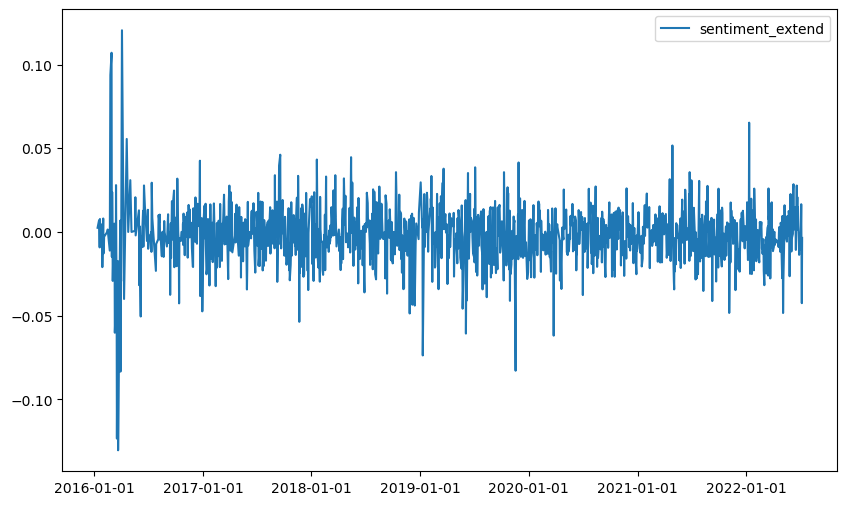

In [9]:
# Generate an instance of figure.Figure and axes.Axes. Specify the size.
fig, ax = plt.subplots(figsize=(10, 6))
# Now that we have an Axes instance, we can plot on top of it: ax.plot(x,y).
ax.plot(sentiment_extend_index_daily.index, sentiment_extend_index_daily[['sentiment_extend']])
#ax.xaxis lets you perform actions on the x axis.
# Set the formatter of the labels using matplotlib.dates.DateFormatter.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
# Add a legend.
ax.legend(['sentiment_extend'])

In [10]:
# Change the format of the index using pandas.DatetimeIndex.strftime
sentiment_extend_index_daily.index = sentiment_extend_index_daily.index.strftime('%Y-%m-%d')
sentiment_extend_index_daily.head()

,sentiment_extend
dates_day,
2016-01-13,0.002483
2016-01-18,0.006968
2016-01-19,0.000638
2016-01-20,-0.009234
2016-01-21,0.007742


In [11]:
# Save the index to Excel file.
sentiment_extend_index_daily.to_excel('sentiment_daily_extend_comp_rev.xlsx')

## Daily sentiment index using extended dictionary (articles that mention either the index firms or their competitors)

In [12]:
data_our_comp = data[(data['indexfirms']==1) | (data['competitors'] == 1)].copy()

In [13]:
inputs = zip(data_our_comp['texts'], itertools.repeat(2))

startTime = datetime.now()

if __name__ == "__main__":
    pool = mp.Pool(NUM_CORE)
    sentiment_extend = pool.starmap(tone_with_negation.tone_with_negation, inputs)
    pool.close()
    pool.join()

print(datetime.now()-startTime)

data_our_comp['sentiment_extend'] = sentiment_extend
data_our_comp.loc[data_our_comp['competitors'] == 1, 'sentiment_extend'] = data_our_comp[data_our_comp['competitors'] == 1]['sentiment_extend'] * (-1)

0:00:59.083798


In [14]:
# Save an average daily sentiment as 'sentiment_extend_index_daily'.
sentiment_extend_index_daily = data_our_comp[['sentiment_extend']].groupby('dates_day').mean()

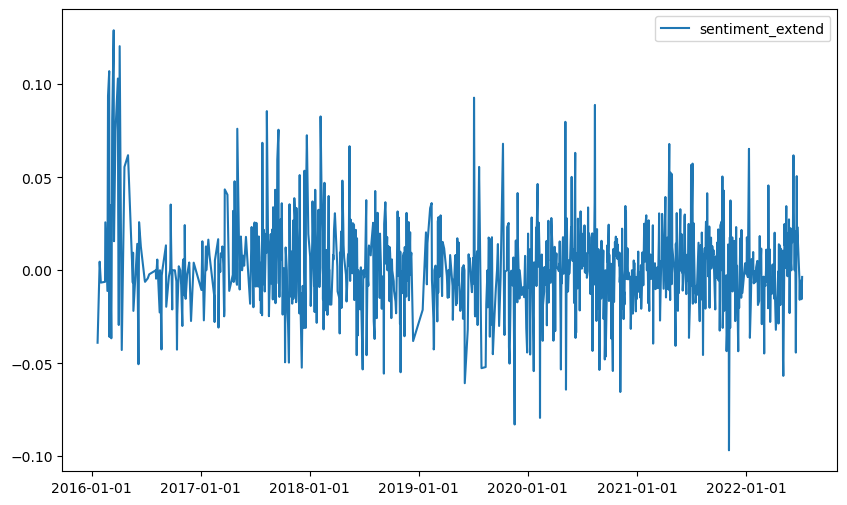

In [15]:
# Generate an instance of figure.Figure and axes.Axes. Specify the size.
fig, ax = plt.subplots(figsize=(10, 6))
# Now that we have an Axes instance, we can plot on top of it: ax.plot(x,y).
ax.plot(sentiment_extend_index_daily.index, sentiment_extend_index_daily[['sentiment_extend']])
#ax.xaxis lets you perform actions on the x axis.
# Set the formatter of the labels using matplotlib.dates.DateFormatter.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
# Add a legend.
ax.legend(['sentiment_extend'])

In [16]:
# Change the format of the index using pandas.DatetimeIndex.strftime
sentiment_extend_index_daily.index = sentiment_extend_index_daily.index.strftime('%Y-%m-%d')
sentiment_extend_index_daily.head()

,sentiment_extend
dates_day,
2016-01-21,-0.038961
2016-01-28,0.004613
2016-02-01,-0.006623
2016-02-15,-0.006211
2016-02-16,0.025773


In [17]:
# Save the index to Excel file.
sentiment_extend_index_daily.to_excel('sentiment_daily_extend_our_comp.xlsx')